# Carbon cycle assessment

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
import glob
import os.path
from mock import MagicMock

import matplotlib.pyplot as plt
import netcdf_scm.io
import numpy as np
import pandas as pd
import pyrcmip.assessed_ranges
import pyrcmip.database
import scmdata
import seaborn as sns
import tqdm.autonotebook as tqdman
from matplotlib.gridspec import GridSpec
from openscm_units import unit_registry

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/pyrcmip/assessed_ranges.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [4]:
import utils.plotting

<IPython.core.display.Javascript object>

In [5]:
# setup matplotlib to save appropriately
utils.plotting.setup()

<IPython.core.display.Javascript object>

In [6]:
DATA_DIR = os.path.join("..", "..", "data")

<IPython.core.display.Javascript object>

In [7]:
PAPER_DIR = os.path.join("..", "..", "paper")

<IPython.core.display.Javascript object>

In [8]:
CMIP_DIR = os.path.join(DATA_DIR, "raw", "cmip-unimelb/20200920")
CMIP_DIR

'../../data/raw/cmip-unimelb/20200920'

<IPython.core.display.Javascript object>

In [9]:
rcmip_concs = scmdata.ScmRun(
    os.path.join(
        DATA_DIR, "raw", "rcmip-inputs", "rcmip-concentrations-annual-means-v5-1-0.csv"
    ),
    lowercase_cols=True,
).filter(variable="Atmos*Conc*CO2", region="World", mip_era="CMIP6")
rcmip_concs["climate_model"] = "CMIP6 ScenarioMIP inputs"
rcmip_concs["Source"] = rcmip_concs["climate_model"]
rcmip_concs

<scmdata.ScmRun (timeseries: 17, timepoints: 801)>
Time:
	Start: 1700-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	                        Source activity_id             climate_model mip_era  \
	32    CMIP6 ScenarioMIP inputs  input4MIPs  CMIP6 ScenarioMIP inputs   CMIP6   
	161   CMIP6 ScenarioMIP inputs  input4MIPs  CMIP6 ScenarioMIP inputs   CMIP6   
	290   CMIP6 ScenarioMIP inputs  input4MIPs  CMIP6 ScenarioMIP inputs   CMIP6   
	419   CMIP6 ScenarioMIP inputs  input4MIPs  CMIP6 ScenarioMIP inputs   CMIP6   
	548   CMIP6 ScenarioMIP inputs  input4MIPs  CMIP6 ScenarioMIP inputs   CMIP6   
	708   CMIP6 ScenarioMIP inputs  input4MIPs  CMIP6 ScenarioMIP inputs   CMIP6   
	837   CMIP6 ScenarioMIP inputs  input4MIPs  CMIP6 ScenarioMIP inputs   CMIP6   
	997   CMIP6 ScenarioMIP inputs  input4MIPs  CMIP6 ScenarioMIP inputs   CMIP6   
	1157  CMIP6 ScenarioMIP inputs  input4MIPs  CMIP6 ScenarioMIP inputs   CMIP6   
	1286  CMIP6 ScenarioMIP inputs  input4MIPs  CMIP6 ScenarioMIP inputs   C

<IPython.core.display.Javascript object>

In [10]:
ASSESSED_RANGES_CSV = os.path.join(
    "..", "..", "data", "processed", "assessed-ranges", "assessed-ranges-v2-2-0.csv"
)
ASSESSED_RANGES_CSV

'../../data/processed/assessed-ranges/assessed-ranges-v2-2-0.csv'

<IPython.core.display.Javascript object>

In [11]:
assessed_ranges = pd.read_csv(ASSESSED_RANGES_CSV)
assessed_ranges.head()

RCMIP name  \
0  Surface Air Ocean Blended Temperature Change W...   
1                    Equilibrium Climate Sensitivity   
2                         Transient Climate Response   
3            Transient Climate Response to Emissions   
4  Effective Radiative Forcing|Anthropogenic|CH4 ...   

                                      RCMIP variable RCMIP region  \
0       Surface Air Ocean Blended Temperature Change        World   
1                                                NaN          NaN   
2                     Surface Air Temperature Change        World   
3  Surface Air Temperature Change,Cumulative Emis...        World   
4      Effective Radiative Forcing|Anthropogenic|CH4        World   

  RCMIP scenario  evaluation_period_start  evaluation_period_end  \
0         ssp245                   2000.0                 2019.0   
1            NaN                      NaN                    NaN   
2        1pctCO2                      NaN                    NaN   
3        1pctCO2                      NaN                    NaN   
4     historical                   2011.0                 2011.0   

   norm_period_start  norm_period_end  very_likely__lower  likely__lower  \
0             1961.0           1990.0            0.462509            NaN   
1                NaN              NaN            2.300000         2.6000   
2                NaN              NaN            0.980000         1.2600   
3                NaN              NaN            1.030000         1.4000   
4             1750.0           1750.0                 NaN         0.4725   

   central  likely__upper  very_likely__upper     unit  \
0   0.5372            NaN            0.613695        K   
1   3.1000         3.9000            4.700000        K   
2   1.6400         2.0200            2.290000        K   
3   1.7700         2.1400            2.510000  K / TtC   
4   0.6000         0.7275                 NaN  W / m^2   

  RCMIP evaluation method                                             Source  
0                    mean                                    HadCRUT.4.6.0.0  
1          model-reported                              Sherwood et al., 2020  
2                  custom    Tokarska et al., 2020 Table S3 Both constrained  
3                  custom                                 Arora et al., 2020  
4                    mean  AR5 WG1 Table 8.SM.6, with extra 25% based on ...

<IPython.core.display.Javascript object>

In [12]:
assessed_ranges.loc[:, "norm_period_start"] = 1850
assessed_ranges.loc[:, "norm_period_end"] = 1850

<IPython.core.display.Javascript object>

In [13]:
assessed_ranges = utils.rcmip.get_monkey_patched_assessed_ranges(
    pyrcmip.assessed_ranges.AssessedRanges(assessed_ranges)
)

<IPython.core.display.Javascript object>

In [14]:
assessed_ranges.head()

RCMIP name  \
0  Surface Air Ocean Blended Temperature Change W...   
1                    Equilibrium Climate Sensitivity   
2                         Transient Climate Response   
3            Transient Climate Response to Emissions   
4  Effective Radiative Forcing|Anthropogenic|CH4 ...   

                                      RCMIP variable RCMIP region  \
0       Surface Air Ocean Blended Temperature Change        World   
1                                                NaN          NaN   
2                     Surface Air Temperature Change        World   
3  Surface Air Temperature Change,Cumulative Emis...        World   
4      Effective Radiative Forcing|Anthropogenic|CH4        World   

  RCMIP scenario  evaluation_period_start  evaluation_period_end  \
0         ssp245                   2000.0                 2019.0   
1            NaN                      NaN                    NaN   
2        1pctCO2                      NaN                    NaN   
3        1pctCO2                      NaN                    NaN   
4     historical                   2011.0                 2011.0   

   norm_period_start  norm_period_end  very_likely__lower  likely__lower  \
0               1850             1850            0.462509            NaN   
1               1850             1850            2.300000         2.6000   
2               1850             1850            0.980000         1.2600   
3               1850             1850            1.030000         1.4000   
4               1850             1850                 NaN         0.4725   

   central  likely__upper  very_likely__upper     unit  \
0   0.5372            NaN            0.613695        K   
1   3.1000         3.9000            4.700000        K   
2   1.6400         2.0200            2.290000        K   
3   1.7700         2.1400            2.510000  K / TtC   
4   0.6000         0.7275                 NaN  W / m^2   

  RCMIP evaluation method                                             Source  
0                    mean                                    HadCRUT.4.6.0.0  
1          model-reported                              Sherwood et al., 2020  
2                  custom    Tokarska et al., 2020 Table S3 Both constrained  
3                  custom                                 Arora et al., 2020  
4                    mean  AR5 WG1 Table 8.SM.6, with extra 25% based on ...

<IPython.core.display.Javascript object>

In [15]:
assessed_ranges.db["RCMIP name"].tolist()

['Surface Air Ocean Blended Temperature Change World ssp245 2000-2019',
 'Equilibrium Climate Sensitivity',
 'Transient Climate Response',
 'Transient Climate Response to Emissions',
 'Effective Radiative Forcing|Anthropogenic|CH4 World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|N2O World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|Montreal Gases World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|F-Gases World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|CO2 World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|Aerosols World historical-1750',
 'Radiative Forcing|Anthropogenic|Tropospheric Ozone World historical-1750',
 'Radiative Forcing|Anthropogenic|Stratospheric Ozone World historical-1750',
 'Radiative Forcing|Anthropogenic|Other|CH4 Oxidation Stratospheric H2O World historical-1750',
 'Radiative Forcing|Anthropogenic|Albedo Change World historical-1750',
 'Radiative Forcing|Anthropogenic|Other|BC

<IPython.core.display.Javascript object>

In [16]:
OUTPUT_DATABASE_DIR = os.path.join(
    "..", "..", "data", "processed", "submission-database"
)
db = pyrcmip.database.Database(OUTPUT_DATABASE_DIR)
db

<utils.scmdata.Database (root_dir: ../../data/processed/submission-database)>

<IPython.core.display.Javascript object>

In [17]:
cc_timeseries = (
    scmdata.run_append(
        [db.load_data("*", v, "World", s) for v in ["Atmos*Conc*CO2"] for s in ["esm*"]]
    ).filter(scenario=["*lowNTCF*", "ssp245-*"], keep=False)
    #     .convert_unit("W / m^2")
)
cc_timeseries

Loading files:   0%|          | 0/160 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])


<scmdata.ScmRun (timeseries: 207120, timepoints: 1101)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2850-01-01T00:00:00
Meta:
	       climate_model  ensemble_member           model region  \
	0           MCE-v1-2              0.0  not_applicable  World   
	1           MCE-v1-2              1.0  not_applicable  World   
	2           MCE-v1-2              2.0  not_applicable  World   
	3           MCE-v1-2              3.0  not_applicable  World   
	4           MCE-v1-2              4.0  not_applicable  World   
	...              ...              ...             ...    ...   
	231081       FaIR1.6            496.0     unspecified  World   
	231082       FaIR1.6            497.0     unspecified  World   
	231083       FaIR1.6            498.0     unspecified  World   
	231084       FaIR1.6            499.0     unspecified  World   
	231085       FaIR1.6            500.0     unspecified  World   
	
	                scenario unit                        variable  
	0             esm-ssp245  ppm 

<IPython.core.display.Javascript object>

In [18]:
cc_timeseries.filter(scenario="esm-ssp585").get_unique_meta("climate_model")

['MCE-v1-2',
 'FaIRv2.0.0-alpha',
 'OSCARv3.1',
 'Cicero-SCM',
 'SCM4OPTv2.1',
 'MAGICCv7.5.1']

<IPython.core.display.Javascript object>

In [19]:
cc_timeseries.filter(scenario="esm-ssp585-allGHG").get_unique_meta("climate_model")

['FaIRv2.0.0-alpha', 'Cicero-SCM', 'SCM4OPTv2.1', 'MAGICCv7.5.1', 'FaIR1.6']

<IPython.core.display.Javascript object>

In [20]:
cc_timeseries.get_unique_meta("scenario")

['esm-ssp245',
 'esm-ssp370',
 'esm-ssp126',
 'esm-rcp60',
 'esm-1pctCO2',
 'esm-hist',
 'esm-pi-cdr-pulse',
 'esm-ssp434',
 'esm-1pct-brch-2000PgC',
 'esm-pi-CO2pulse',
 'esm-1pct-brch-1000PgC',
 'esm-ssp585',
 'esm-ssp534-over',
 'esm-ssp460',
 'esm-1pct-brch-750PgC',
 'esm-rcp45',
 'esm-ssp119',
 'esm-rcp26',
 'esm-rcp85',
 'esm-ssp585-allGHG',
 'esm-ssp434-allGHG',
 'esm-ssp245-allGHG',
 'esm-ssp534-over-allGHG',
 'esm-ssp119-allGHG',
 'esm-ssp370-allGHG',
 'esm-ssp460-allGHG',
 'esm-ssp126-allGHG',
 'esm-rcp85-allGHG',
 'esm-rcp45-allGHG',
 'esm-rcp60-allGHG',
 'esm-rcp26-allGHG',
 'esm-hist-allGHG',
 'esm-hist-cmip5',
 'esm-hist-cmip5-allGHG',
 'esm-bell-1000PgC',
 'esm-bell-750PgC',
 'esm-bell-2000PgC']

<IPython.core.display.Javascript object>

In [21]:
cc_timeseries.get_unique_meta("climate_model")

['MCE-v1-2',
 'FaIRv2.0.0-alpha',
 'OSCARv3.1',
 'Cicero-SCM',
 'SCM4OPTv2.1',
 'MAGICCv7.5.1',
 'FaIR1.6']

<IPython.core.display.Javascript object>

In [22]:
cc_timeseries.get_unique_meta("variable")

['Atmospheric Concentrations|CO2']

<IPython.core.display.Javascript object>

In [23]:
cc_timeseries.filter(scenario="esm-hist").timeseries(drop_all_nan_times=True)

time                                                                                              1750-01-01  \
climate_model ensemble_member model          region scenario unit variable                                     
MCE-v1-2      0.0             not_applicable World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              1.0             not_applicable World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              2.0             not_applicable World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              3.0             not_applicable World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              4.0             not_applicable World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
...                                                                                                      ...   
MAGICCv7.5.1  595.0           unspecified    World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              596.0           unspecified    World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              597.0           unspecified    World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              598.0           unspecified    World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              599.0           unspecified    World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   

time                                                                                              1751-01-01  \
climate_model ensemble_member model          region scenario unit variable                                     
MCE-v1-2      0.0             not_applicable World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              1.0             not_applicable World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              2.0             not_applicable World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              3.0             not_applicable World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              4.0             not_applicable World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
...                                                                                                      ...   
MAGICCv7.5.1  595.0           unspecified    World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              596.0           unspecified    World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              597.0           unspecified    World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              598.0           unspecified    World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              599.0           unspecified    World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   

time                                                                                              1752-01-01  \
climate_model ensemble_member model          region scenario unit variable                                     
MCE-v1-2      0.0             not_applicable World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              1.0             not_applicable World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              2.0             not_applicable World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              3.0             not_applicable World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              4.0             not_applicable World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
...                                                                                                      ...   
MAGICCv7.5.1  595.0           unspecified    World  esm-hist ppm  Atmospheric Concentrations|CO2         NaN   
              596.0           unspecified    World  esm-hist ppm  Atmospheric 

<IPython.core.display.Javascript object>

For the purpose of this exercise, treat FaIR esm-ssp\*-allGHG same as esm-ssp\*.

In [24]:
fair_hack = cc_timeseries.filter(scenario="esm-ssp*-allGHG", climate_model="FaIR1.6")
fair_hack_hist = fair_hack.filter(scenario="esm-ssp245-allGHG", year=range(1, 2014 + 1))
fair_hack_hist["scenario"] = "esm-hist-allGHG"
fair_hack = fair_hack.append(fair_hack_hist)
fair_hack

<scmdata.ScmRun (timeseries: 4509, timepoints: 1101)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2850-01-01T00:00:00
Meta:
	     climate_model  ensemble_member        model region           scenario  \
	0          FaIR1.6              0.0  unspecified  World  esm-ssp585-allGHG   
	1          FaIR1.6              1.0  unspecified  World  esm-ssp585-allGHG   
	2          FaIR1.6              2.0  unspecified  World  esm-ssp585-allGHG   
	3          FaIR1.6              3.0  unspecified  World  esm-ssp585-allGHG   
	4          FaIR1.6              4.0  unspecified  World  esm-ssp585-allGHG   
	...            ...              ...          ...    ...                ...   
	4504       FaIR1.6            496.0  unspecified  World    esm-hist-allGHG   
	4505       FaIR1.6            497.0  unspecified  World    esm-hist-allGHG   
	4506       FaIR1.6            498.0  unspecified  World    esm-hist-allGHG   
	4507       FaIR1.6            499.0  unspecified  World    esm-hist-allGHG   
	4508      

<IPython.core.display.Javascript object>

In [25]:
fair_hack["scenario"] = fair_hack["scenario"].str.replace("-allGHG", "")
fair_hack

<scmdata.ScmRun (timeseries: 4509, timepoints: 1101)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2850-01-01T00:00:00
Meta:
	     climate_model  ensemble_member        model region    scenario unit  \
	0          FaIR1.6              0.0  unspecified  World  esm-ssp585  ppm   
	1          FaIR1.6              1.0  unspecified  World  esm-ssp585  ppm   
	2          FaIR1.6              2.0  unspecified  World  esm-ssp585  ppm   
	3          FaIR1.6              3.0  unspecified  World  esm-ssp585  ppm   
	4          FaIR1.6              4.0  unspecified  World  esm-ssp585  ppm   
	...            ...              ...          ...    ...         ...  ...   
	4504       FaIR1.6            496.0  unspecified  World    esm-hist  ppm   
	4505       FaIR1.6            497.0  unspecified  World    esm-hist  ppm   
	4506       FaIR1.6            498.0  unspecified  World    esm-hist  ppm   
	4507       FaIR1.6            499.0  unspecified  World    esm-hist  ppm   
	4508       FaIR1.6            50

<IPython.core.display.Javascript object>

In [26]:
cc_timeseries = cc_timeseries.append(fair_hack)

<IPython.core.display.Javascript object>

In [27]:
def remove_pipes_in_axis_labels(ax):
    replace_args = [
        "Atmospheric Concentrations|",
        "Atmospheric Concentrations ",
    ]
    ax.set_ylabel(ax.get_ylabel().replace(*replace_args))
    ax.set_xlabel(ax.get_xlabel().replace(*replace_args))

    return ax

<IPython.core.display.Javascript object>

Using OSCAR reported data for Increase Atmospheric Concentrations|CO2 World esm-hist-2011


Renormalising histograms:   0%|          | 0/7 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
findfont: Font family ['DejaVu Sans'] not found. Falling back to Helvetica.


../../paper/historical_atmospheric-concentrations-co2_v_assessment.pdf


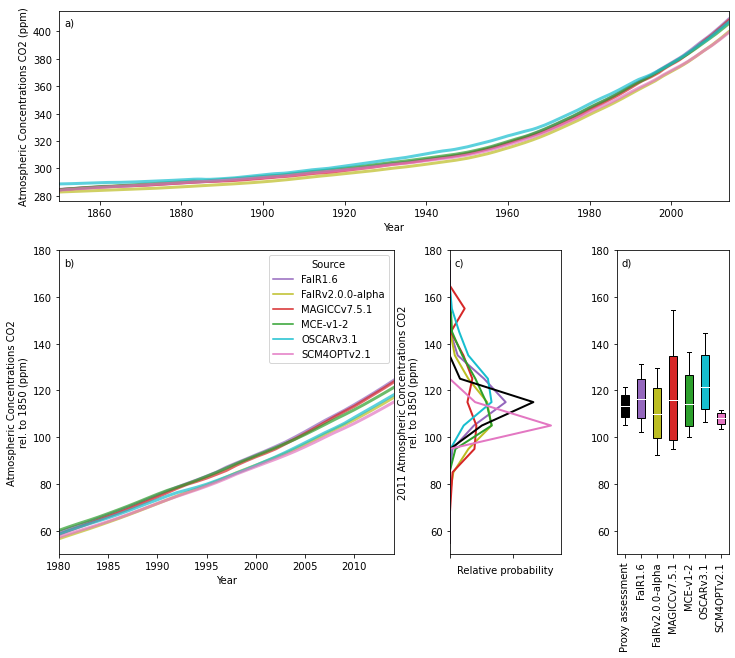

<IPython.core.display.Javascript object>

In [28]:
for variable, metric, scenario, ylim_pdf, bins, custom_heights in (
    (
        "Atmospheric Concentrations|CO2",
        "Increase Atmospheric Concentrations|CO2 World esm-hist-2011",
        "esm-hist",
        [50, 180],
        np.arange(50, 181, 10),
        {},
    ),
):
    fig = plt.figure(figsize=(12, 10))
    gs = GridSpec(
        2, 3, width_ratios=[3, 1, 1], height_ratios=[1, 1.6], wspace=0.3, hspace=0.2
    )
    ax_ts = fig.add_subplot(gs[1, 0])
    ax_box = fig.add_subplot(gs[1, 2], sharey=ax_ts)
    ax_pdf = fig.add_subplot(gs[1, 1], sharey=ax_ts)
    ax_ts_long_same_ref_period = fig.add_subplot(gs[0, :])

    plt_years = range(1980, 2014 + 1)
    plt_years_long = range(1850, 2014 + 1)

    (
        ax_ts,
        ax_pdf,
        ax_box,
        (ax_ts_long_same_ref_period,),
    ) = utils.plotting.make_hist_assessed_range_comparison_figure(
        assessed_ranges=assessed_ranges,
        data_scmrun=cc_timeseries,
        obs=None,
        variable=variable,
        metric=metric,
        include_assessed_pdf=True,
        quantiles=(0.5,),
        process_over_columns=("ensemble_member",),
        linewidth=3,
        palette=utils.plotting.CLIMATE_MODEL_PALETTE,
        hue="Source",
        scenario=scenario,
        plt_years=plt_years,
        long_ts_ref_periods_axes_plt_years=(
            (ax_ts_long_same_ref_period, None, plt_years_long),
        ),
        ax_ts=ax_ts,
        ax_pdf=ax_pdf,
        ax_box=ax_box,
        ylim_pdf=ylim_pdf,
        bins=bins,
        custom_heights=custom_heights,
    )

    for ax in [ax_ts, ax_pdf, ax_ts_long_same_ref_period]:
        ax = remove_pipes_in_axis_labels(ax)

    plt.tight_layout()
    outfile = os.path.join(
        PAPER_DIR,
        "historical_{}_v_assessment.pdf".format(
            variable.lower().replace(" ", "-").replace("|", "-")
        ),
    )
    plt.savefig(outfile, **utils.plotting.SAVE_KWARGS)
    print(outfile)
    plt.show()

## Projections

In [29]:
cmip_co2s_esm_ssp_files_raw = glob.glob(
    os.path.join(CMIP_DIR, "point-start-year", "**", "*_co2_*esm-ssp585*1850*.MAG"),
    recursive=True,
)
cmip_co2s_esm_ssp_files_raw = [
    f for f in cmip_co2s_esm_ssp_files_raw if "NORMED" not in f
]
len(cmip_co2s_esm_ssp_files_raw)
cmip_co2s_esm_ssp_files_raw

['../../data/raw/cmip-unimelb/20200920/point-start-year/CMIP6/C4MIP/BCC/BCC-CSM2-MR/esm-ssp585/r1i1p1f1/Zombimon/co2/gn/v20190424/netcdf-scm_co2_Zombimon_BCC-CSM2-MR_esm-ssp585_r1i1p1f1_gn_1850-2100.MAG',
 '../../data/raw/cmip-unimelb/20200920/point-start-year/CMIP6/C4MIP/MPI-M/MPI-ESM1-2-LR/esm-ssp585/r5i1p1f1/Zombimon/co2/gn/v20190815/netcdf-scm_co2_Zombimon_MPI-ESM1-2-LR_esm-ssp585_r5i1p1f1_gn_1850-2099.MAG',
 '../../data/raw/cmip-unimelb/20200920/point-start-year/CMIP6/C4MIP/MPI-M/MPI-ESM1-2-LR/esm-ssp585/r2i1p1f1/Zombimon/co2/gn/v20190815/netcdf-scm_co2_Zombimon_MPI-ESM1-2-LR_esm-ssp585_r2i1p1f1_gn_1850-2099.MAG',
 '../../data/raw/cmip-unimelb/20200920/point-start-year/CMIP6/C4MIP/MPI-M/MPI-ESM1-2-LR/esm-ssp585/r1i1p1f1/Zombimon/co2/gn/v20190710/netcdf-scm_co2_Zombimon_MPI-ESM1-2-LR_esm-ssp585_r1i1p1f1_gn_1850-2099.MAG',
 '../../data/raw/cmip-unimelb/20200920/point-start-year/CMIP6/C4MIP/MPI-M/MPI-ESM1-2-LR/esm-ssp585/r10i1p1f1/Zombimon/co2/gn/v20190815/netcdf-scm_co2_Zombimon_MPI

<IPython.core.display.Javascript object>

In [30]:
cmip_timeseries = (
    scmdata.run_append(
        [
            netcdf_scm.io.load_mag_file(f, drs="CMIP6Output")
            for f in tqdman.tqdm(cmip_co2s_esm_ssp_files_raw)
        ]
    )
    .filter(region="World")
    .convert_unit("dimensionless")
    * 10 ** 6
    * unit_registry("ppm")
)
cmip_timeseries.head()

  0%|          | 0/24 [00:00<?, ?it/s]

time                                                                                     1850-01-01  \
activity_id climate_model member_id mip_era model       region scenario   unit variable               
C4MIP       BCC-CSM2-MR   r1i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          287.875   
            MPI-ESM1-2-LR r5i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          283.275   
                          r2i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          283.793   
                          r1i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          282.345   
                          r10i1p1f1 CMIP6   unspecified World  esm-ssp585 ppm  co2          282.960   

time                                                                                     1851-01-01  \
activity_id climate_model member_id mip_era model       region scenario   unit variable               
C4MIP       BCC-CSM2-MR   r1i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          287.963   
            MPI-ESM1-2-LR r5i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          283.782   
                          r2i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          284.354   
                          r1i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          281.883   
                          r10i1p1f1 CMIP6   unspecified World  esm-ssp585 ppm  co2          281.648   

time                                                                                     1852-01-01  \
activity_id climate_model member_id mip_era model       region scenario   unit variable               
C4MIP       BCC-CSM2-MR   r1i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          287.313   
            MPI-ESM1-2-LR r5i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          284.431   
                          r2i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          284.527   
                          r1i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          282.430   
                          r10i1p1f1 CMIP6   unspecified World  esm-ssp585 ppm  co2          282.045   

time                                                                                     1853-01-01  \
activity_id climate_model member_id mip_era model       region scenario   unit variable               
C4MIP       BCC-CSM2-MR   r1i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          288.081   
            MPI-ESM1-2-LR r5i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          284.671   
                          r2i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          284.155   
                          r1i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          282.963   
                          r10i1p1f1 CMIP6   unspecified World  esm-ssp585 ppm  co2          282.635   

time                                                                                     1854-01-01  \
activity_id climate_model member_id mip_era model       region scenario   unit variable               
C4MIP       BCC-CSM2-MR   r1i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          288.453   
            MPI-ESM1-2-LR r5i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          285.338   
                          r2i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          283.738   
                          r1i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          284.784   
                          r10i1p1f1 CMIP6   unspecified World  esm-ssp585 ppm  co2          283.128   

time                                                                                     1855-01-01  \
activity_id climate_model member_id mip_era model       region scenario   unit variable               
C4MIP       BCC-CSM2-MR   r1i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co2          288.138   
            MPI-ESM1-2-LR r5i1p1f1  CMIP6   unspecified World  esm-ssp585 ppm  co

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='time', ylabel='ppm'>

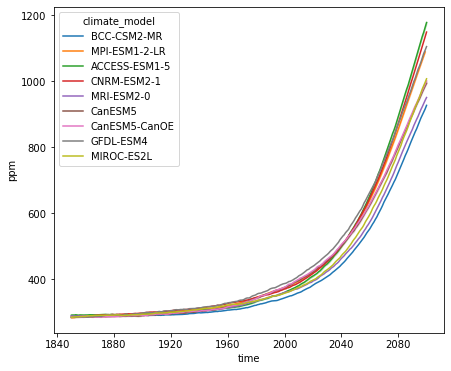

<IPython.core.display.Javascript object>

In [31]:
cmip_timeseries.lineplot(hue="climate_model")

In [32]:
quantiles = (0.5,)
process_over_columns = ("ensemble_member",)
ref_period = None
linewidth = 3

palette = utils.plotting.CLIMATE_MODEL_PALETTE
palette["CMIP6 MME"] = "tab:blue"
palette["CMIP6 ScenarioMIP inputs"] = "black"

hue = "Source"
units = "climate_model"
variable = "Atmospheric Concentrations|CO2"
cmip_var = "co2"
unit = "ppm"
include_assessed_pdf = False

<IPython.core.display.Javascript object>

Scenarios:   0%|          | 0/1 [00:00<?, ?it/s]

esm-ssp585
esm-ssp585 2081-2100 Atmospheric Concentrations|CO2 (ppm)
Using OSCAR reported data for esm-ssp585 2081-2100 Atmospheric Concentrations|CO2 (ppm)


Renormalising histograms:   0%|          | 0/7 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/esm-ssp585-atmos-co2-2100.pdf


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


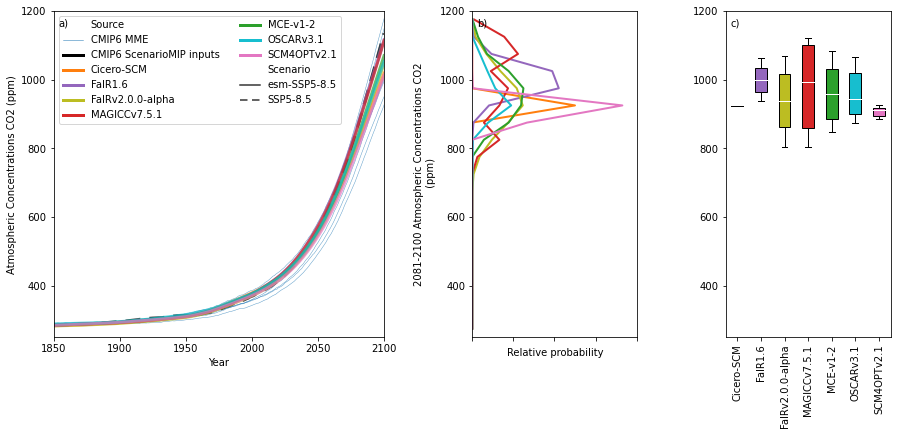

<IPython.core.display.Javascript object>

In [33]:
scenarios_ylims_peaks = (
    (
        "esm-ssp585",
        [250, 1200],
        False,
        True,
        {"Cicero-SCM": 1 / 2, "OSCARv3.1": 1 / 2},
        50,
    ),
)

for (
    scenario,
    ylim_ts,
    include_peak,
    cmip6,
    custom_heights,
    bin_width,
) in tqdman.tqdm(scenarios_ylims_peaks[:], desc="Scenarios"):
    fig, axes = utils.plotting.make_overview_plot(
        cc_timeseries,
        None,
        quantiles,
        process_over_columns,
        scenario,
        ref_period,
        eval_period_end=range(2081, 2100 + 1),
        plt_years=range(1850, 2100 + 1),
        ylim_ts=ylim_ts,
        linewidth=linewidth,
        palette=palette,
        hue=hue,
        units=units,
        variable=variable,
        cmip_var=cmip_var,
        unit=unit,
        include_peak=include_peak,
        custom_heights=custom_heights,
        cmip6=cmip6,
        cmip_timeseries=cmip_timeseries,
        include_assessed_pdf=False,
        bin_width=bin_width,
        cmip6_input=rcmip_concs.filter(scenario=scenario.replace("esm-", "")),
        force_fig_width=15,
    )

    for ax in plt.gcf().axes:
        ax = remove_pipes_in_axis_labels(ax)

    plt.tight_layout()
    outfile = os.path.join(
        PAPER_DIR,
        f"{scenario}-atmos-co2-2100.pdf",
    )
    plt.savefig(outfile, **utils.plotting.SAVE_KWARGS)
    print(outfile)
    plt.tight_layout()
    plt.show()

Scenarios:   0%|          | 0/2 [00:00<?, ?it/s]

esm-ssp119
esm-ssp119 2081-2100 Atmospheric Concentrations|CO2 (ppm)
Using OSCAR reported data for esm-ssp119 2081-2100 Atmospheric Concentrations|CO2 (ppm)


Renormalising histograms:   0%|          | 0/7 [00:00<?, ?it/s]

esm-ssp119
esm-ssp119 Peak Atmospheric Concentrations|CO2 (ppm)
Not using OSCAR reported data for esm-ssp119 Peak Atmospheric Concentrations|CO2 (ppm)


Renormalising histograms:   0%|          | 0/7 [00:00<?, ?it/s]

esm-ssp119
esm-ssp119 Year of peak Atmospheric Concentrations|CO2 (ppm)
Not using OSCAR reported data for esm-ssp119 Year of peak Atmospheric Concentrations|CO2 (ppm)


Renormalising histograms:   0%|          | 0/7 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/esm-ssp119-atmos-co2-2100.pdf


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


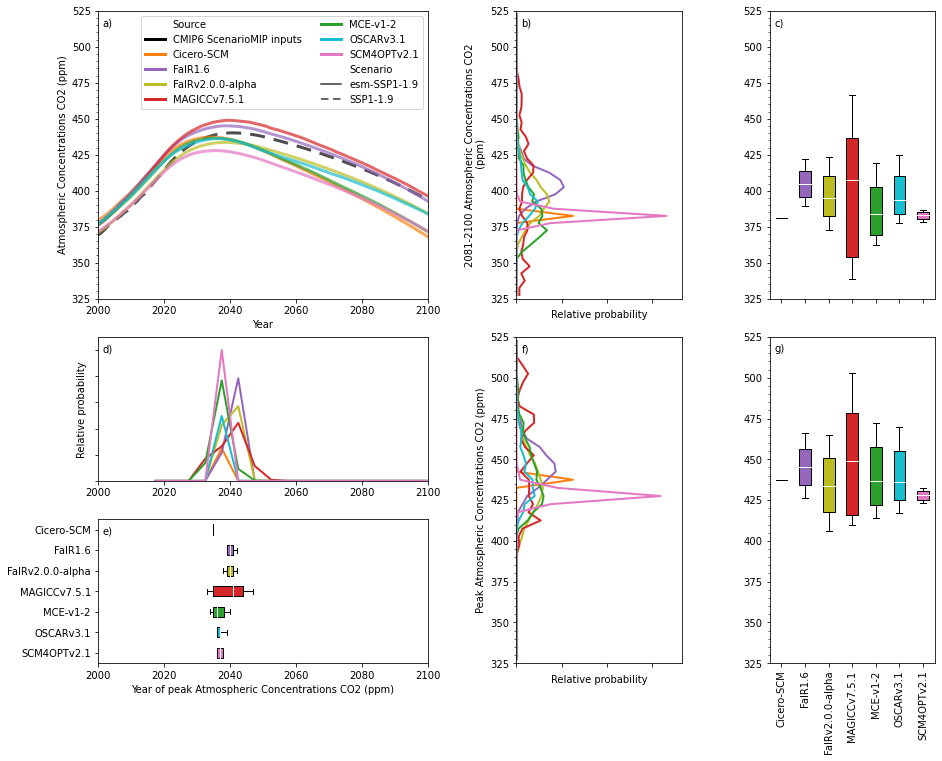

esm-ssp126
esm-ssp126 2081-2100 Atmospheric Concentrations|CO2 (ppm)
Using OSCAR reported data for esm-ssp126 2081-2100 Atmospheric Concentrations|CO2 (ppm)


Renormalising histograms:   0%|          | 0/7 [00:00<?, ?it/s]

esm-ssp126
esm-ssp126 Peak Atmospheric Concentrations|CO2 (ppm)
Not using OSCAR reported data for esm-ssp126 Peak Atmospheric Concentrations|CO2 (ppm)


Renormalising histograms:   0%|          | 0/7 [00:00<?, ?it/s]

esm-ssp126
esm-ssp126 Year of peak Atmospheric Concentrations|CO2 (ppm)
Not using OSCAR reported data for esm-ssp126 Year of peak Atmospheric Concentrations|CO2 (ppm)


Renormalising histograms:   0%|          | 0/7 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


../../paper/esm-ssp126-atmos-co2-2100.pdf


/data/ubuntu-znicholls/miniconda3/envs/rcmip-phase-2/lib/python3.7/site-packages/ipykernel_launcher.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


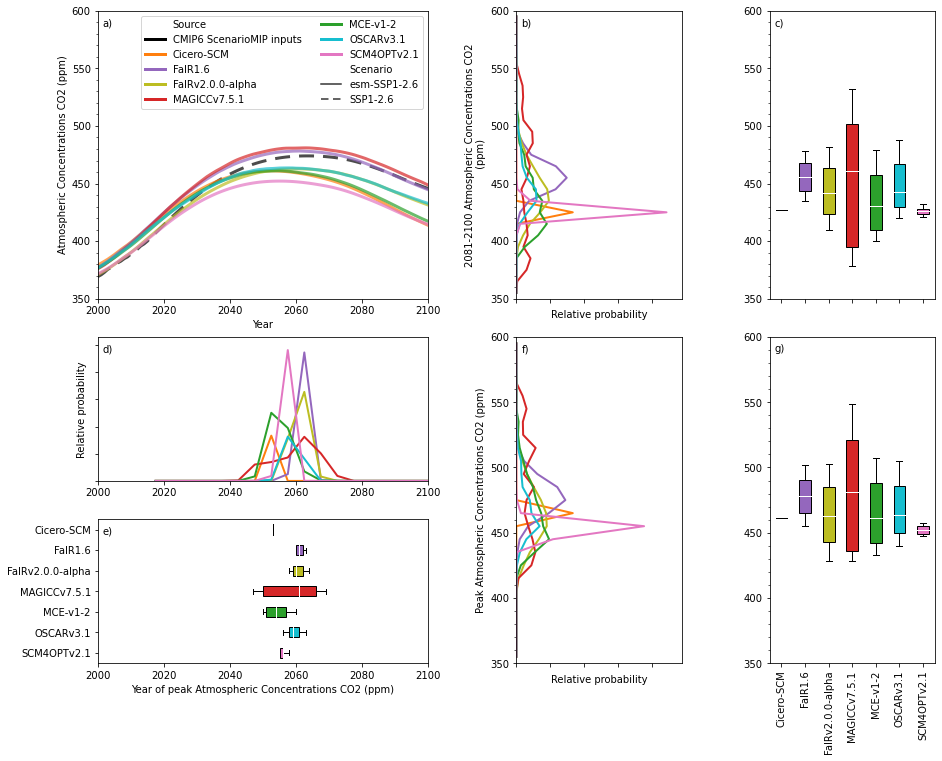

<IPython.core.display.Javascript object>

In [34]:
scenarios_ylims_peaks = (
    (
        "esm-ssp119",
        [325, 525],
        True,
        False,
        {"Cicero-SCM": 1 / 4, "OSCARv3.1": 1 / 2},
        5,
    ),
    (
        "esm-ssp126",
        [350, 600],
        True,
        False,
        {"Cicero-SCM": 1 / 3, "OSCARv3.1": 1 / 2},
        10,
    ),
    #     (
    #         "esm-ssp434",
    #         [350, 600],
    #         True,
    #         False,
    #         {"Cicero-SCM": 1 / 3, "OSCARv3.1": 1 / 2},
    #         10,
    #     ),
    #     (
    #         "esm-ssp534-over",
    #         [350, 700],
    #         True,
    #         False,
    #         {"Cicero-SCM": 1 / 4, "OSCARv3.1": 1 / 2},
    #         10,
    #     ),
    #     (
    #         "esm-ssp245",
    #         [350, 750],
    #         False,
    #         False,
    #         {"Cicero-SCM": 1 / 3, "OSCARv3.1": 1 / 2},
    #         25,
    #     ),
    #     (
    #         "esm-ssp460",
    #         [350, 800],
    #         False,
    #         False,
    #         {"Cicero-SCM": 1 / 3, "OSCARv3.1": 1 / 2},
    #         25,
    #     ),
    #     (
    #         "esm-ssp370",
    #         [350, 1000],
    #         False,
    #         False,
    #         {"Cicero-SCM": 1 / 3, "OSCARv3.1": 1 / 2},
    #         25,
    #     ),
)

for (
    scenario,
    ylim_ts,
    include_peak,
    cmip6,
    custom_heights,
    bin_width,
) in tqdman.tqdm(scenarios_ylims_peaks[:], desc="Scenarios"):
    utils.plotting.make_overview_plot(
        cc_timeseries,
        None,
        quantiles,
        process_over_columns,
        scenario,
        ref_period,
        eval_period_end=range(2081, 2100 + 1),
        plt_years=range(2000, 2100 + 1),
        ylim_ts=ylim_ts,
        linewidth=linewidth,
        palette=palette,
        hue=hue,
        units=units,
        variable=variable,
        cmip_var=cmip_var,
        unit=unit,
        include_peak=include_peak,
        custom_heights=custom_heights,
        cmip6=cmip6,
        cmip_timeseries=cmip_timeseries,
        include_assessed_pdf=False,
        bin_width=bin_width,
        cmip6_input=rcmip_concs.filter(scenario=scenario.replace("esm-", "")),
        force_fig_width=15,
    )

    for ax in plt.gcf().axes:
        ax = remove_pipes_in_axis_labels(ax)

    plt.tight_layout()
    outfile = os.path.join(
        PAPER_DIR,
        f"{scenario}-atmos-co2-2100.pdf",
    )
    plt.savefig(outfile, **utils.plotting.SAVE_KWARGS)
    print(outfile)
    plt.tight_layout()
    plt.show()

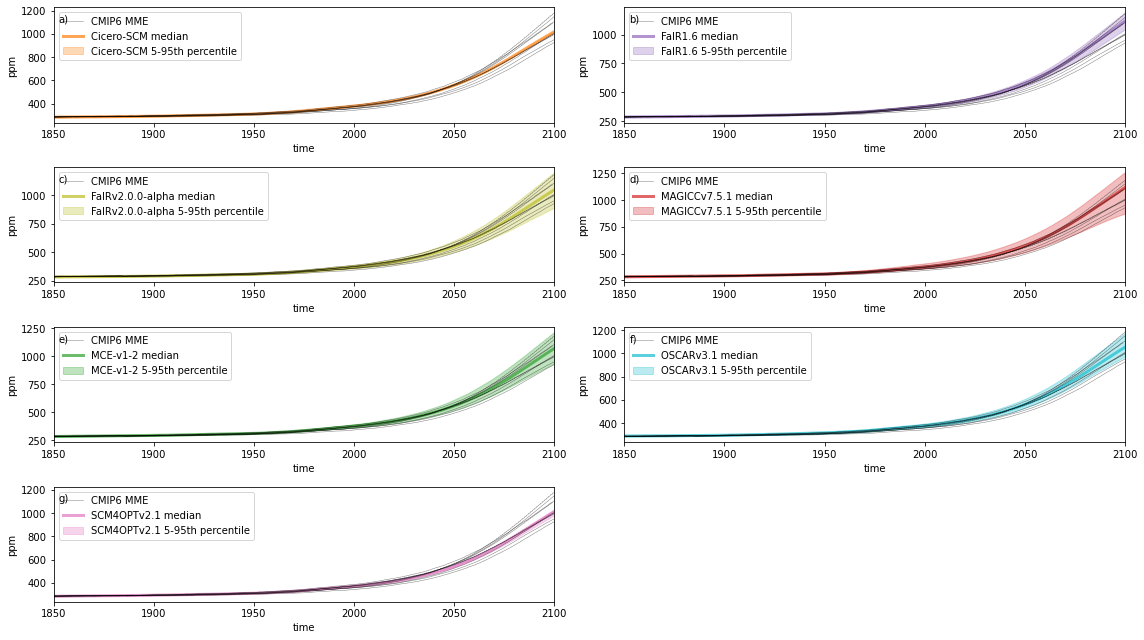

<IPython.core.display.Javascript object>

In [37]:
tmp = cc_timeseries.filter(
    scenario="esm-ssp585", variable="*Conc*CO2", year=range(1850, 2100 + 1)
)
fig, axes = plt.subplots(figsize=(16, 9), nrows=4, ncols=2)
cm_list = list(tmp.groupby("climate_model"))
for i, (cm, ax) in enumerate(zip(cm_list, axes.flatten())):
    qdf = utils.plotting.calculate_quantiles(
        cm, (0.05, 0.5, 0.95), process_over_columns
    )

    climate_model = cm.get_unique_meta("climate_model", no_duplicates=True)

    ax.plot(
        2000,
        400,
        color="black",
        linewidth=0.5,
        alpha=0.5,
        label="CMIP6 MME",
    )

    ax.plot(
        qdf["year"].values.squeeze(),
        qdf.filter(quantile=0.5).values.squeeze(),
        color=palette[climate_model],
        linewidth=3,
        alpha=0.7,
        label=f"{climate_model} median",
    )
    ax.fill_between(
        qdf["year"].values.squeeze(),
        qdf.filter(quantile=0.05).values.squeeze(),
        qdf.filter(quantile=0.95).values.squeeze(),
        color=palette[climate_model],
        alpha=0.3,
        label=f"{climate_model} 5-95th percentile",
    )
    #     ax = qdf.lineplot(
    #         hue="climate_model",
    #         style="quantile",
    #         dashes={0.05: (2, 2), 0.5: "", 0.95: (5, 3)},
    #         palette=palette,
    #         ax=ax,
    #     )
    cmip_timeseries.lineplot(
        units="climate_model",
        palette=["black"],
        estimator=None,
        ax=ax,
        linewidth=0.5,
        alpha=0.5,
        legend=False,
        time_axis="year",
    )
    ax.legend(loc="upper left")
    ax.set_xlim([1850, 2100])
    utils.plotting.add_panel_label(ax, i)

axes[-1][-1].axis("off")
plt.tight_layout()